In [1]:
import numpy as np
import control as ct
import NonLinVehicleSystem as NLVS

In [2]:
v1 = NLVS.NonLinVehicleSystem(50,12.5,.8)

In [3]:
# Simulation parameter
T = np.linspace(0,500,1000)
x0 = np.array([0,0,0,0,0,0])  # initial condition
inp = np.ones(T.shape)
U = [inp*2,inp,inp]

sys = v1.RawSystem()
# input response without controller
t, y = ct.input_output_response(sys, T, U, x0)

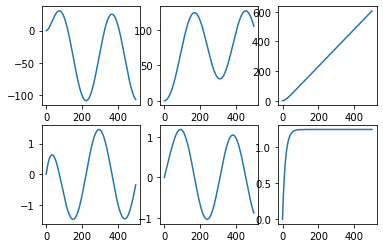

In [4]:
import matplotlib.pyplot as plt

# Plot
plt.figure(1)
plt.figure(1,figsize=[12.8,9.6])
plt.subplot(231)
plt.plot(t,y[0])
plt.subplot(232)
plt.plot(t,y[1])
plt.subplot(233)
plt.plot(t,y[2])
plt.subplot(234)
plt.plot(t,y[3])
plt.subplot(235)
plt.plot(t,y[4])
plt.subplot(236)
plt.plot(t,y[5])
plt.show()


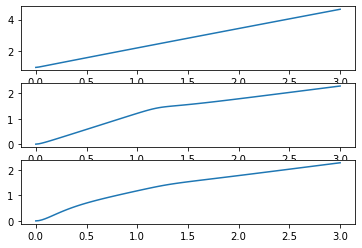

In [24]:
# Simulation parameter
syspos = v1.PosControlSystem()
nT = 100;
T = np.linspace(0,3,nT)
x0 = np.array([1,0,0,0,0,0])  # initial condition
inp = np.ones(T.shape)*3
U = [inp*2,inp,inp]
# input response without controller
t, y = ct.input_output_response(syspos, T,U,x0,solve_ivp_method='Radau')

# Plot
plt.figure(2)
plt.figure(2,figsize=[12.8,9.6])
plt.subplot(311)
plt.plot(t,y[0])
plt.subplot(312)
plt.plot(t,y[1])
plt.subplot(313)
plt.plot(t,y[2])

##### 

In [37]:
list(y[:,2])

[1.0131804078108213,
 0.05925062711527221,
 0.09087970896336861,
 0.41389404976374555,
 1.2341693144877295,
 2.6071794995703654]

In [9]:
from state import StateTrajectory
from state import State

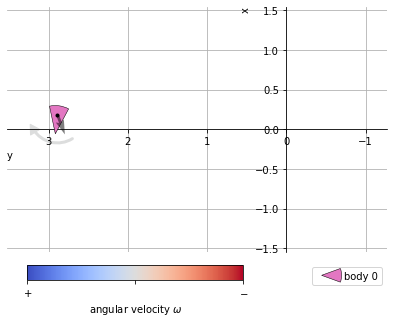

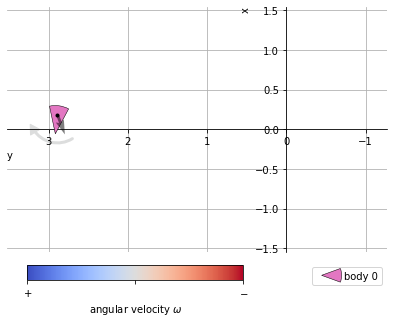

In [19]:
from state import StateTrajectory
from state import State

s = list(y[:,99])
x1 = State(x=[s],coord_sys='a')
x1.plot_state()


### CNN Model and Traj

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import TFNNModels as NNM
import NavigationTrajectory as nt
nt = nt.NavigationTrajectory()

C:\Users\ai598\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Created navigation trajectory object


In [5]:
model_conv1D_tar1 = tf.keras.models.load_model('Models\ Newmodel_conv1D_tar1')  # LOAD MODEL
model_conv1D_tar2 = tf.keras.models.load_model('Models\ Newmodel_conv1D_tar2')  # LOAD MODEL
model_conv1D_tar3 = tf.keras.models.load_model('Models\ Newmodel_conv1D_tar3')  # LOAD MODEL
model_conv1D_tar4 = tf.keras.models.load_model('Models\ Newmodel_conv1D_tar4')  # LOAD MODEL

In [6]:
# import data
df_good_inp = pd.read_csv('DataFiles/TestData_inp.csv')  # import data
df_good_target = pd.read_csv('DataFiles/TestData_tar.csv')  # import data
test_data_reshaped = np.asarray(df_good_inp)
test_data_reshaped = test_data_reshaped.reshape(5290,6,1)

In [7]:
test_predictions1=model_conv1D_tar1.predict(test_data_reshaped)
test_predictions2=model_conv1D_tar2.predict(test_data_reshaped)
test_predictions3=model_conv1D_tar3.predict(test_data_reshaped)
test_predictions4=model_conv1D_tar4.predict(test_data_reshaped)

166/166 [==============================] - 0s 2ms/step


In [8]:
def TargetAray(t1,t2,t3,t4):
    
    target = []
    for x in range(0,len(t1)):
        Array = np.array([t1[x],t2[x],t3[x],t4[x]])
        target.append(Array)
    return np.asarray(target).reshape(len(t1),4)        
    

In [9]:
goodinp = np.asarray(df_good_inp)
predtar = TargetAray(test_predictions1,test_predictions2,test_predictions3,test_predictions4)
indx = 4
Vmove = nt.Gen_MoveC2(goodinp,predtar,indx,parts=6)

In [30]:
Vmove[:,10][1] 

0.7438178658485413

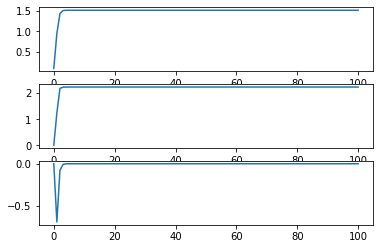

In [42]:
import matplotlib.pyplot as plt

ind = 10
# Simulation parameter
syspos = v1.PosControlSystem()
nT = 100;
T = np.linspace(0,100,nT)
x0 = np.array([.1,0,0,0,0,0])  # initial condition
inp = np.ones(T.shape)*3
U = [inp*Vmove[:,ind][0],inp*Vmove[:,ind][1],inp*0]
# input response without controller
t, y = ct.input_output_response(syspos, T,U,x0,solve_ivp_method='Radau')

# Plot
plt.figure(2)
plt.figure(2,figsize=[12.8,9.6])
plt.subplot(311)
plt.plot(t,y[0])
plt.subplot(312)
plt.plot(t,y[1])
plt.subplot(313)
plt.plot(t,y[2])

In [ ]:
y

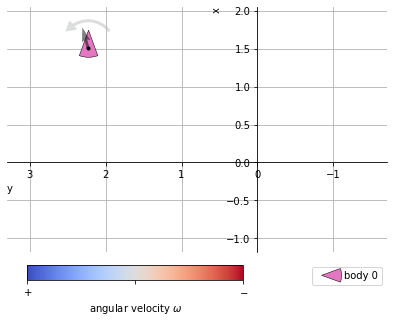

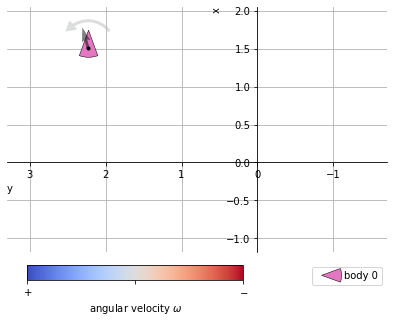

In [43]:
from state import StateTrajectory
from state import State

s = list(y[:,99])
x1 = State(x=[s],coord_sys='a')
x1.plot_state()